In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('gen_results_with_classifier_predictions.csv')
df

,comment,comment_pred,comment_pred_prob,label,model,insights,generated_comment,generated_comment_pred,generated_comment_pred_prob
0,title: CMV: I believe that it's a good thing t...,0,0.361110,1,gpt-35-turbo,False,Title: CMV: I believe that it's a good thing t...,0,0.468916
1,title: CMV: Rappers don't have any real talent...,0,0.358139,1,gpt-35-turbo,False,title: CMV: Rappers don't have any real talent...,0,0.350715
2,title: CMV: Analog clocks are pointless. [SEP]...,0,0.336249,1,gpt-35-turbo,False,"As a lover of analog clocks, I must say that t...",0,0.366585
3,title: I think Python is the best first progra...,0,0.360664,1,gpt-35-turbo,False,Title: Why Python is the Best First Programmin...,0,0.434141
4,"title: CMV: The term ""steep learning curve"" is...",0,0.374222,1,gpt-35-turbo,False,"Title: CMV: The term ""steep learning curve"" is...",0,0.450483
...,...,...,...,...,...,...,...,...,...
787,"title: CMV: Todd Packer from ""The Office"" is n...",0,0.337989,0,claude-3-opus-20240229,False,While you raise an interesting point about Tod...,0,0.366364
788,title: CMV: I think the best way to deal with ...,0,0.336437,0,claude-3-opus-20240229,False,While I appreciate the sentiment of creating a...,0,0.401945
789,title: I believe that profits of companies sho...,0,0.329560,0,claude-3-opus-20240229,False,While it's true that companies like Walmart an...,0,0.370367
790,title: CMV:I am Liberal [SEP] comment: You sai...,0,0.340333,0,claude-3-opus-20240229,False,You raise a thought-provoking point about the ...,0,0.441177


In [81]:
from scipy.stats import ttest_rel

# Assuming 'df' is your DataFrame with 'comment_pred_prob' as the original prediction probabilities
# and 'generated_comment_pred_prob' as the new prediction probabilities after processing/enhancement

# Conducting the paired t-test
t_statistic, p_value = ttest_rel(df['comment_pred_prob'], df['generated_comment_pred_prob'])

# Print the test statistic and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -29.418892977094647
P-value: 4.312661538131557e-129


In [ ]:
df['model'] = df['model'].str.replace('claude-3-opus-20240229', 'claude-3')
df

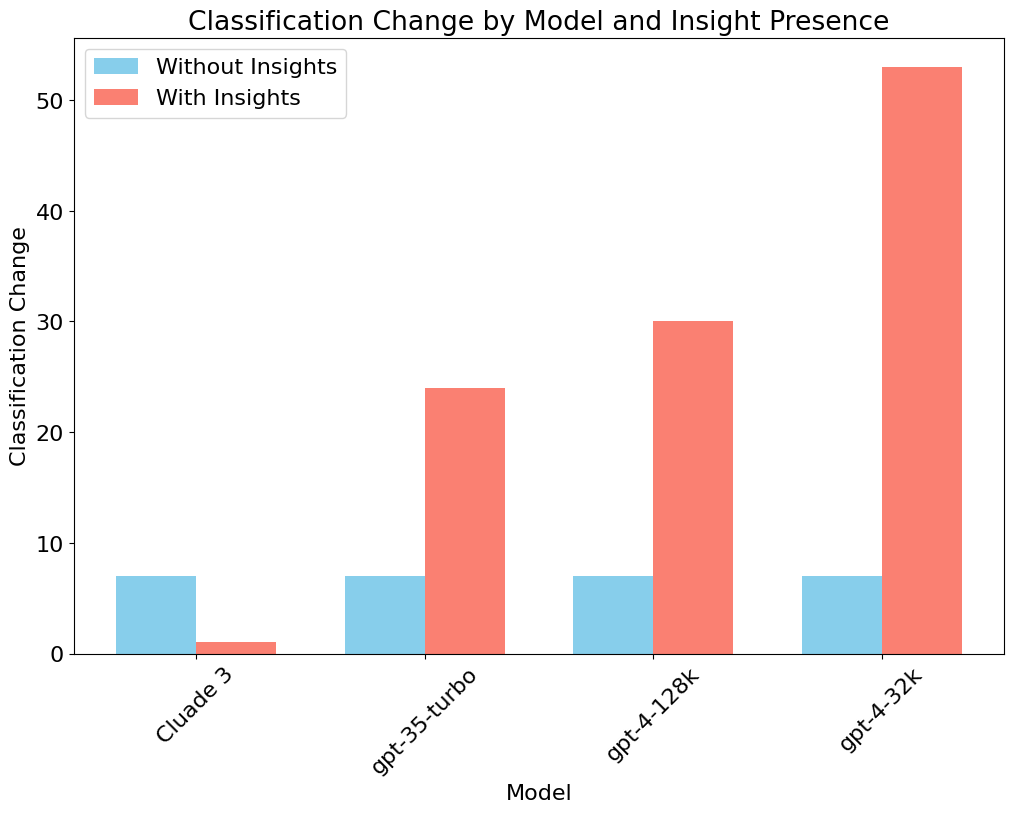

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Example DataFrame 'grouped_pred_change' should be replaced with your actual DataFrame
# It should have columns: 'model', 'insights', and 'pred_change'

# Assuming 'grouped_pred_change' is your DataFrame with the necessary data
models = ['Cluade 3', 'gpt-35-turbo', 'gpt-4-128k', 'gpt-4-32k']
changes_with_insights = grouped_pred_change[grouped_pred_change['insights'] == True]['pred_change']
changes_without_insights = grouped_pred_change[grouped_pred_change['insights'] == False]['pred_change']

# Setting positions of the bars on the X axis
index = np.arange(len(models))
bar_width = 0.35

# Plotting
plt.figure(figsize=(12, 8))
bars_with_insights = plt.bar(index, changes_with_insights, bar_width, label='With Insights', color='skyblue')
bars_without_insights = plt.bar(index + bar_width, changes_without_insights, bar_width, label='Without Insights', color='salmon')

# Adding labels and title
plt.rcParams.update({'font.size':16})
plt.xlabel('Model')
plt.ylabel('Classification Change')
plt.title('Classification Change by Model and Insight Presence')
plt.xticks(index + bar_width / 2, models, rotation=45)
plt.legend(['Without Insights', 'With Insights'], loc='best')

# Show the plot
# plt.tight_layout()
# plt.show()
plt.savefig("classification changed.pdf", format="pdf", bbox_inches="tight")

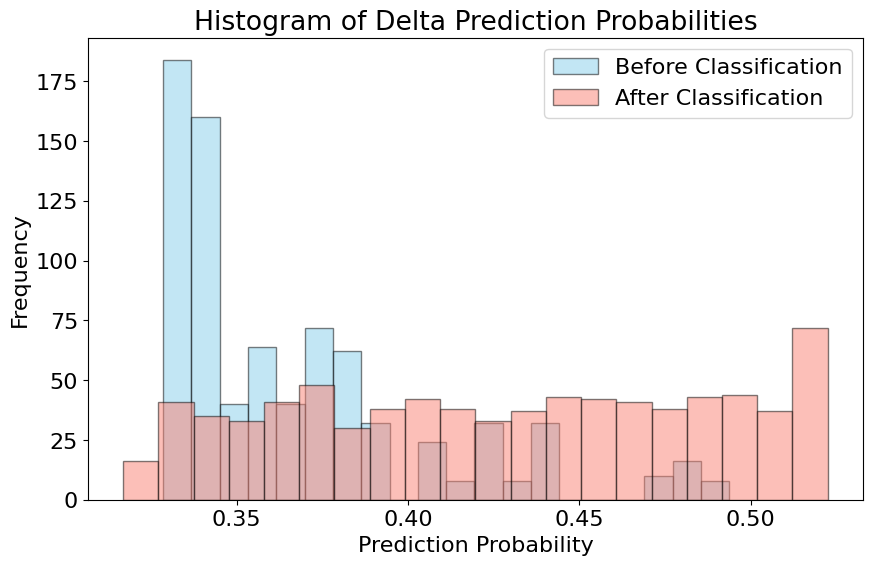

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and it's already loaded with your data
# Example: df = pd.read_csv('path_to_your_file.csv')

# Plotting the histograms on the same graph
plt.figure(figsize=(10, 6))

# Histogram for original comment prediction probabilities
plt.hist(df['comment_pred_prob'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Before Classification')

# Histogram for generated comment prediction probabilities
plt.hist(df['generated_comment_pred_prob'], bins=20, color='salmon', edgecolor='black', alpha=0.5, label='After Classification')

plt.title('Histogram of Delta Prediction Probabilities')
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.legend() # This adds a legend to differentiate the two histograms
plt.show()


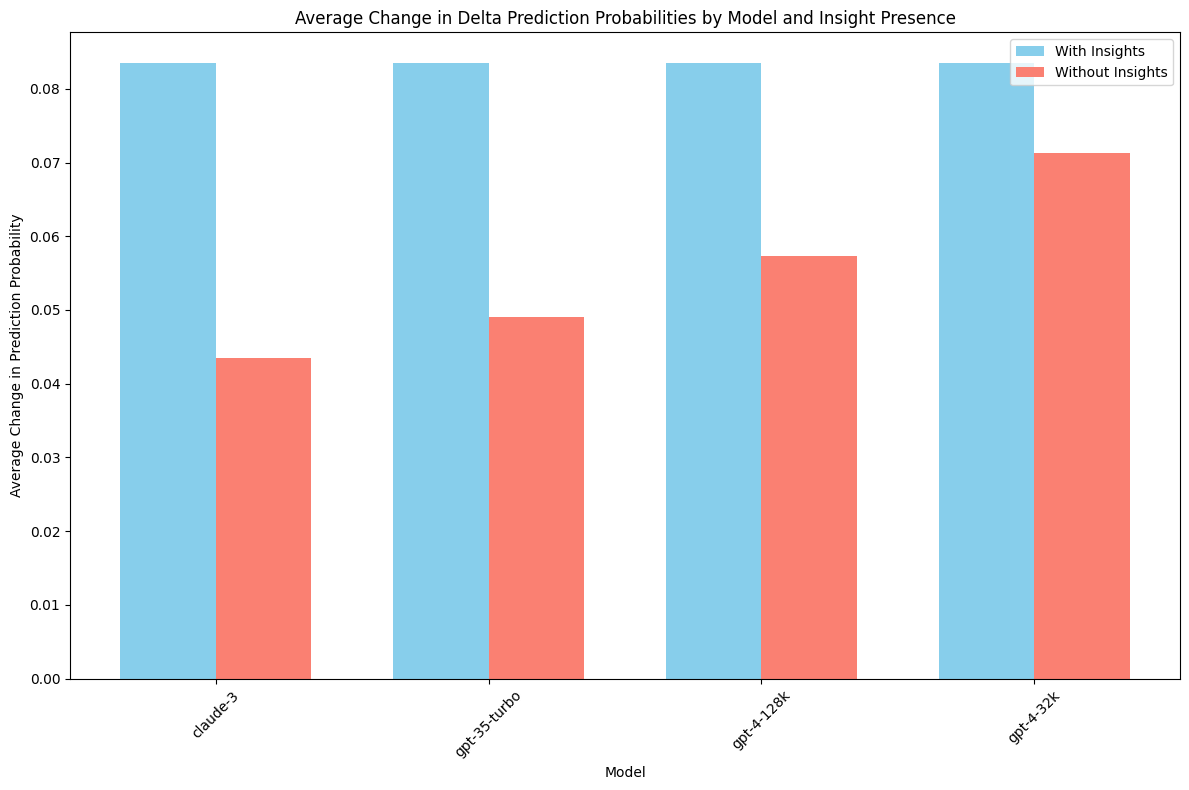

In [28]:
# Calculating the change in prediction probability for each comment
df['prob_change'] = df['generated_comment_pred_prob'] - df['comment_pred_prob']

# Grouping the data by model and insights, then calculating the average probability change
grouped_mean_change = df.groupby(['model', 'insights']).agg({
    'prob_change': 'mean'
}).reset_index()

# Preparing data for plotting
models = grouped_mean_change['model'].unique()
changes_with_insights = grouped_mean_change[grouped_mean_change['insights'] == True]['prob_change']
changes_without_insights = grouped_mean_change[grouped_mean_change['insights'] == False]['prob_change']

# Setting positions of the bars on the X axis
n_groups = len(models)
index = np.arange(n_groups)
bar_width = 0.35

# Creating the plot
plt.figure(figsize=(12, 8))

# Plotting 'prob_change' for comments with and without insights for each model
plt.bar(index, changes_with_insights, bar_width, color='skyblue', label='With Insights')
plt.bar(index + bar_width, changes_without_insights, bar_width, color='salmon', label='Without Insights')

# Adding titles and labels
plt.xlabel('Model')
plt.ylabel('Average Change in Prediction Probability')
plt.title('Average Change in Delta Prediction Probabilities by Model and Insight Presence')
plt.xticks(index + bar_width / 2, models, rotation=45)
plt.legend()

# Showing plot
plt.tight_layout()
plt.show()
